In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch.nn as nn
from torch.nn import Sequential
from torch.autograd import Variable

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn import svm

from IPython.display import Markdown, display

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv(
    "data/plos_fulldata.csv",
    # names=header,
    index_col=0)

In [4]:
display(df)

,filename,doi_x,AccessionID,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,...,cited_by_qna_count,cited_by_peer_review_sites_count,cited_by_weibo_count,cited_by_pinners_count,cited_by_linkedin_count,urn,cited_by_book_reviews_count,editors,attribution,ordinal_number
0,journal.pone.0080347.xml,10.1371/journal.pone.0080347,journal.pone.0080347,29.270,38.69,7.5,36,6.72,21,242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,journal.pone.0054670.xml,10.1371/journal.pone.0054670,journal.pone.0054670,17.565,29.11,7.3,33,4.67,13,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,journal.pone.0195986.xml,10.1371/journal.pone.0195986,journal.pone.0195986,25.780,26.14,7.7,48,4.98,10,239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,journal.pone.0150364.xml,10.1371/journal.pone.0150364,journal.pone.0150364,25.815,28.30,7.8,43,4.81,10,207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,journal.pone.0184653.xml,10.1371/journal.pone.0184653,journal.pone.0184653,27.640,34.60,7.2,47,5.40,16,254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189843,journal.pone.0212848.xml,10.1371/journal.pone.0212848,journal.pone.0212848,16.840,29.56,7.6,36,3.64,10,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189844,journal.pone.0157412.xml,10.1371/journal.pone.0157412,journal.pone.0157412,16.545,22.58,6.9,24,6.38,17,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189845,journal.pone.0109208.xml,10.1371/journal.pone.0109208,journal.pone.0109208,24.015,27.25,7.2,38,6.71,23,255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189846,journal.pntd.0004608.xml,10.1371/journal.pntd.0004608,journal.pntd.0004608,22.815,37.57,7.3,32,5.56,14,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_rows', None)
df.dtypes

filename                             object
doi_x                                object
AccessionID                          object
reading_time                        float64
flesch_reading_score                float64
dale_chall_readability_score        float64
total_paragraphs                      int64
avg_sentences_per_para              float64
len_of_longest_paragraph              int64
total_sentences                       int64
avg_words_per_sentence              float64
len_of_longest_sentence               int64
total_words                           int64
compulsive_hedgers                    int64
intensifiers                          int64
and_frequency                       float64
vague_words_count                     int64
vague_words_frequency               float64
polysyllab_count                      int64
polysyllab_frequency                float64
title                                object
doi_y                                object
pmid                            

In [4]:
df = df.fillna(0)
df = df.sample(frac=1)

In [7]:
display(df)

,filename,doi_x,AccessionID,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,...,cited_by_qna_count,cited_by_peer_review_sites_count,cited_by_weibo_count,cited_by_pinners_count,cited_by_linkedin_count,urn,cited_by_book_reviews_count,editors,attribution,ordinal_number
37127,journal.pone.0052166.xml,10.1371/journal.pone.0052166,journal.pone.0052166,29.880,21.26,7.4,38,6.29,16,239,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
145595,journal.pone.0065261.xml,10.1371/journal.pone.0065261,journal.pone.0065261,26.590,32.06,7.5,49,4.76,13,233,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
21819,journal.pmed.0050203.xml,10.1371/journal.pmed.0050203,journal.pmed.0050203,28.880,38.59,6.6,62,4.21,13,261,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
75150,journal.pone.0047522.xml,10.1371/journal.pone.0047522,journal.pone.0047522,20.155,31.35,7.4,29,5.69,15,165,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
13190,journal.pone.0188532.xml,10.1371/journal.pone.0188532,journal.pone.0188532,21.685,21.47,7.6,40,4.42,12,177,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,journal.ppat.1006340.xml,10.1371/journal.ppat.1006340,journal.ppat.1006340,39.690,22.38,7.3,53,6.23,13,330,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
109500,journal.pone.0024116.xml,10.1371/journal.pone.0024116,journal.pone.0024116,23.105,34.29,7.2,35,5.94,13,208,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
60556,journal.pone.0103600.xml,10.1371/journal.pone.0103600,journal.pone.0103600,18.160,29.42,7.2,28,5.04,12,141,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
161173,journal.pcbi.1005515.xml,10.1371/journal.pcbi.1005515,journal.pcbi.1005515,42.960,44.48,6.2,47,8.13,17,382,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


## Multi-label --> One label

In [4]:
features = df.iloc[:, 3: 20]
feature_names = df.columns[3: 20]
labels = df[['cited_by_fbwalls_count', 'cited_by_feeds_count',
       'cited_by_gplus_count', 'cited_by_msm_count', 'cited_by_posts_count',
       'cited_by_tweeters_count', 'cited_by_wikipedia_count',
       'cited_by_accounts_count', 'score']]
# features = (features - features.mean()) / features.std()
# labels = (labels - labels.mean()) / labels.std()
labels = labels.sum(axis=1)

In [77]:
feature_names

Index(['reading_time', 'flesch_reading_score', 'dale_chall_readability_score',
       'total_paragraphs', 'avg_sentences_per_para',
       'len_of_longest_paragraph', 'total_sentences', 'avg_words_per_sentence',
       'len_of_longest_sentence', 'total_words', 'compulsive_hedgers',
       'intensifiers', 'and_frequency', 'vague_words_count',
       'vague_words_frequency', 'polysyllab_count', 'polysyllab_frequency'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=120)

In [6]:
X_train.shape

(151878, 17)

In [7]:
y_train.shape

(151878,)

In [8]:
X_test.shape

(37970, 17)

In [9]:
y_test.shape

(37970,)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

In [11]:
X_train.shape

(121502, 17)

In [12]:
y_train.shape

(121502,)

In [13]:
X_val.shape

(30376, 17)

In [14]:
y_val.shape

(30376,)

### Random Forest Regressor

In [ ]:
train_losses = []
val_losses = []
depths = []

for depth in range(1, 50, 2):
    depths.append(depth)
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

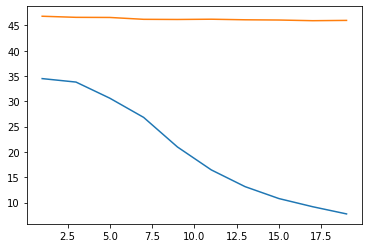

In [72]:
plt.plot(depths, train_losses)
plt.plot(depths, val_losses)

### SVM

In [73]:
train_losses = []
val_losses = []
depths = []

for degree in range(1, 20):
    depths.append(depth)
    model = svm.SVR(kernel="poly", C=100, gamma="auto", degree=degree, epsilon=0.1, coef0=1)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

NameError: name 'svm' is not defined

### K Nearest

## One label

In [5]:
features = df.iloc[:, 3: 20]
feature_names = df.columns[3: 20]
labels = df[['score']]
ten_percentile = labels.quantile(0.9)
labels = labels.loc[labels['score'] >= ten_percentile.values.item()]
features = features.iloc[labels.index, :]
scaler = StandardScaler().fit(features)
features = scaler.transform(features)
scaler2 = StandardScaler().fit(labels)
labels = scaler2.transform(labels)

In [6]:
features.shape

(18985, 17)

In [7]:
labels.shape

(18985, 1)

In [8]:
feature_names

Index(['reading_time', 'flesch_reading_score', 'dale_chall_readability_score',
       'total_paragraphs', 'avg_sentences_per_para',
       'len_of_longest_paragraph', 'total_sentences', 'avg_words_per_sentence',
       'len_of_longest_sentence', 'total_words', 'compulsive_hedgers',
       'intensifiers', 'and_frequency', 'vague_words_count',
       'vague_words_frequency', 'polysyllab_count', 'polysyllab_frequency'],
      dtype='object')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [10]:
X_train.shape

(15188, 17)

In [11]:
y_train.shape

(15188, 1)

In [12]:
X_test.shape

(3797, 17)

In [13]:
y_test.shape

(3797, 1)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [15]:
X_train.shape

(12150, 17)

In [16]:
y_train.shape

(12150, 1)

In [17]:
X_val.shape

(3038, 17)

In [18]:
y_val.shape

(3038, 1)

### Random Forest Regressor

In [124]:
train_losses = []
val_losses = []
depths = []

for depth in range(1, 20, 2):
    depths.append(depth)
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

1 0.9662366769870702 0.6014638899826618
3 0.8981500220087203 0.6016919870178906
5 0.8081579878875854 0.6025801756046945
7 0.6982635869797934 0.5961619361397886
9 0.5745405979363906 0.5934002355204436
11 0.47283498032973625 0.5897865075116784
13 0.37496799624210203 0.5895724739850338
15 0.3114596683716153 0.5805194275869678
17 0.24544841249103092 0.5897219602062371
19 0.2026616811879154 0.5935113470425214


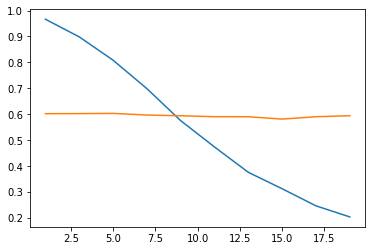

In [125]:
plt.plot(depths, train_losses)
plt.plot(depths, val_losses)

### SVM

In [19]:
train_losses = []
val_losses = []
Cs = []

for C in np.arange(0.1, 1, 0.1):
    model = svm.SVR(kernel="poly", C=C, gamma="auto")
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)

    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    Cs.append(C)
    print(C, train_loss, val_loss)

0.1 0.9652300572896527 0.5690028701831091
0.2 0.9644058128464404 0.5696851814248899
0.30000000000000004 0.9638248180219879 0.5718677950690246
0.4 0.9633658890825079 0.5738333685213038
0.5 0.9629810694842016 0.5818124202424254
0.6 0.9626894843008406 0.5913621841069949
0.7000000000000001 0.9624082119127046 0.6063384514241837
0.8 0.962127515426404 0.626735620983751
0.9 0.9619814242231046 0.6422994804588767


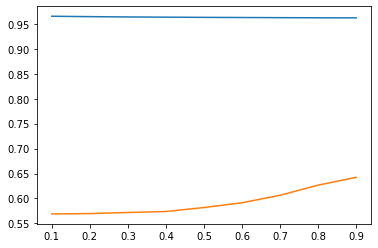

In [20]:
plt.plot(Cs, train_losses)
plt.plot(Cs, val_losses)

### Decision Tree

In [21]:
train_losses = []
val_losses = []
depths = []

for depth in range(1, 20, 2):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    depths.append(depth)
    print(depth, train_loss, val_loss)

1 0.9224406027430735 0.5299369060161482
3 0.8544185704053054 0.7127514050108599
5 0.8427113057775023 0.7322389233647114
7 0.682420684859984 0.7317956823088814
9 0.6347384227792057 0.8747225833948262
11 0.6044901598926798 0.8769924711979034
13 0.5393030495346771 1.0528202805818379
15 0.5010776534482977 0.9709257899182485
17 0.45789786745859884 0.9952631336937456
19 0.3322287205968784 1.1604123316138215


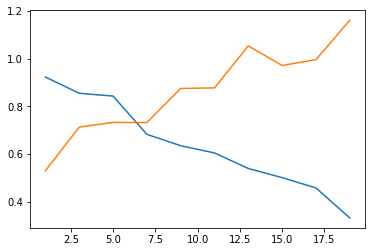

In [22]:
plt.plot(depths, train_losses)
plt.plot(depths, val_losses)

### K-nearest

In [23]:
train_losses = []
val_losses = []
neighbors = []

for n in range(5, 30, 2):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    neighbors.append(n)
    print(n, train_loss, val_loss)

5 0.7285761939465532 0.6949923279577527
7 0.7858336969484446 0.6633349069970634
9 0.8251224397871096 0.627752639033071
11 0.8417733009402302 0.6096022441048594
13 0.8567846229234704 0.591489387918855
15 0.8646542709790358 0.5809457995102818
17 0.8704156774969759 0.5753474559929491
19 0.8756664651857335 0.5635069350333421
21 0.880547514557336 0.5625984668361196
23 0.8835239230771762 0.5596308508609401
25 0.8873460593222005 0.5564852630747223
27 0.8904944948885127 0.5548298244601849
29 0.8935695869755961 0.5522184257511334


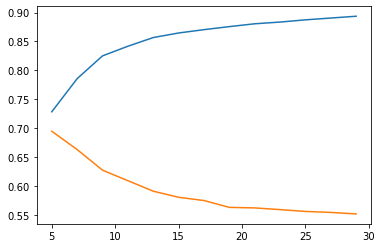

In [25]:
plt.plot(neighbors, train_losses)
plt.plot(neighbors, val_losses)

### MLP